In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("ml_case_training_data.csv")
df = df[["cons_12m", "cons_gas_12m", "cons_last_month", "churn"]]

## 기본 통계 확인

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16092 entries, 0 to 16091
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   cons_12m         16092 non-null  int64
 1   cons_gas_12m     16092 non-null  int64
 2   cons_last_month  16092 non-null  int64
 3   churn            16092 non-null  int64
dtypes: int64(4)
memory usage: 503.0 KB


In [21]:
df.head()

,cons_12m,cons_gas_12m,cons_last_month,churn
0,22034,0,3084,0
1,4060,0,0,0
2,7440,0,1062,0
3,4199490,728810,456462,0
4,11272,0,0,0


In [22]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,churn
count,1.609200e+04,1.609200e+04,1.609200e+04,16092.000000
mean,1.948460e+05,3.191957e+04,1.946575e+04,0.099118
std,6.795943e+05,1.776098e+05,8.236655e+04,0.298829
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,0.000000
50%,1.533250e+04,0.000000e+00,9.005000e+02,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,1.000000


## 상관성 확인


<AxesSubplot:>

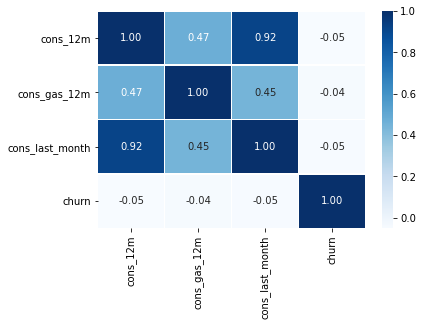

In [9]:
sns.heatmap(data=df.corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

---
cons feature들은 종속 변수 churn과 상관관계가 없음   
cons_last_month와 cons_12m 은 큰 상관관계가 있음
---

## 분포 확인

In [38]:
col_list = ["cons_12m", "cons_gas_12m", "cons_last_month"]

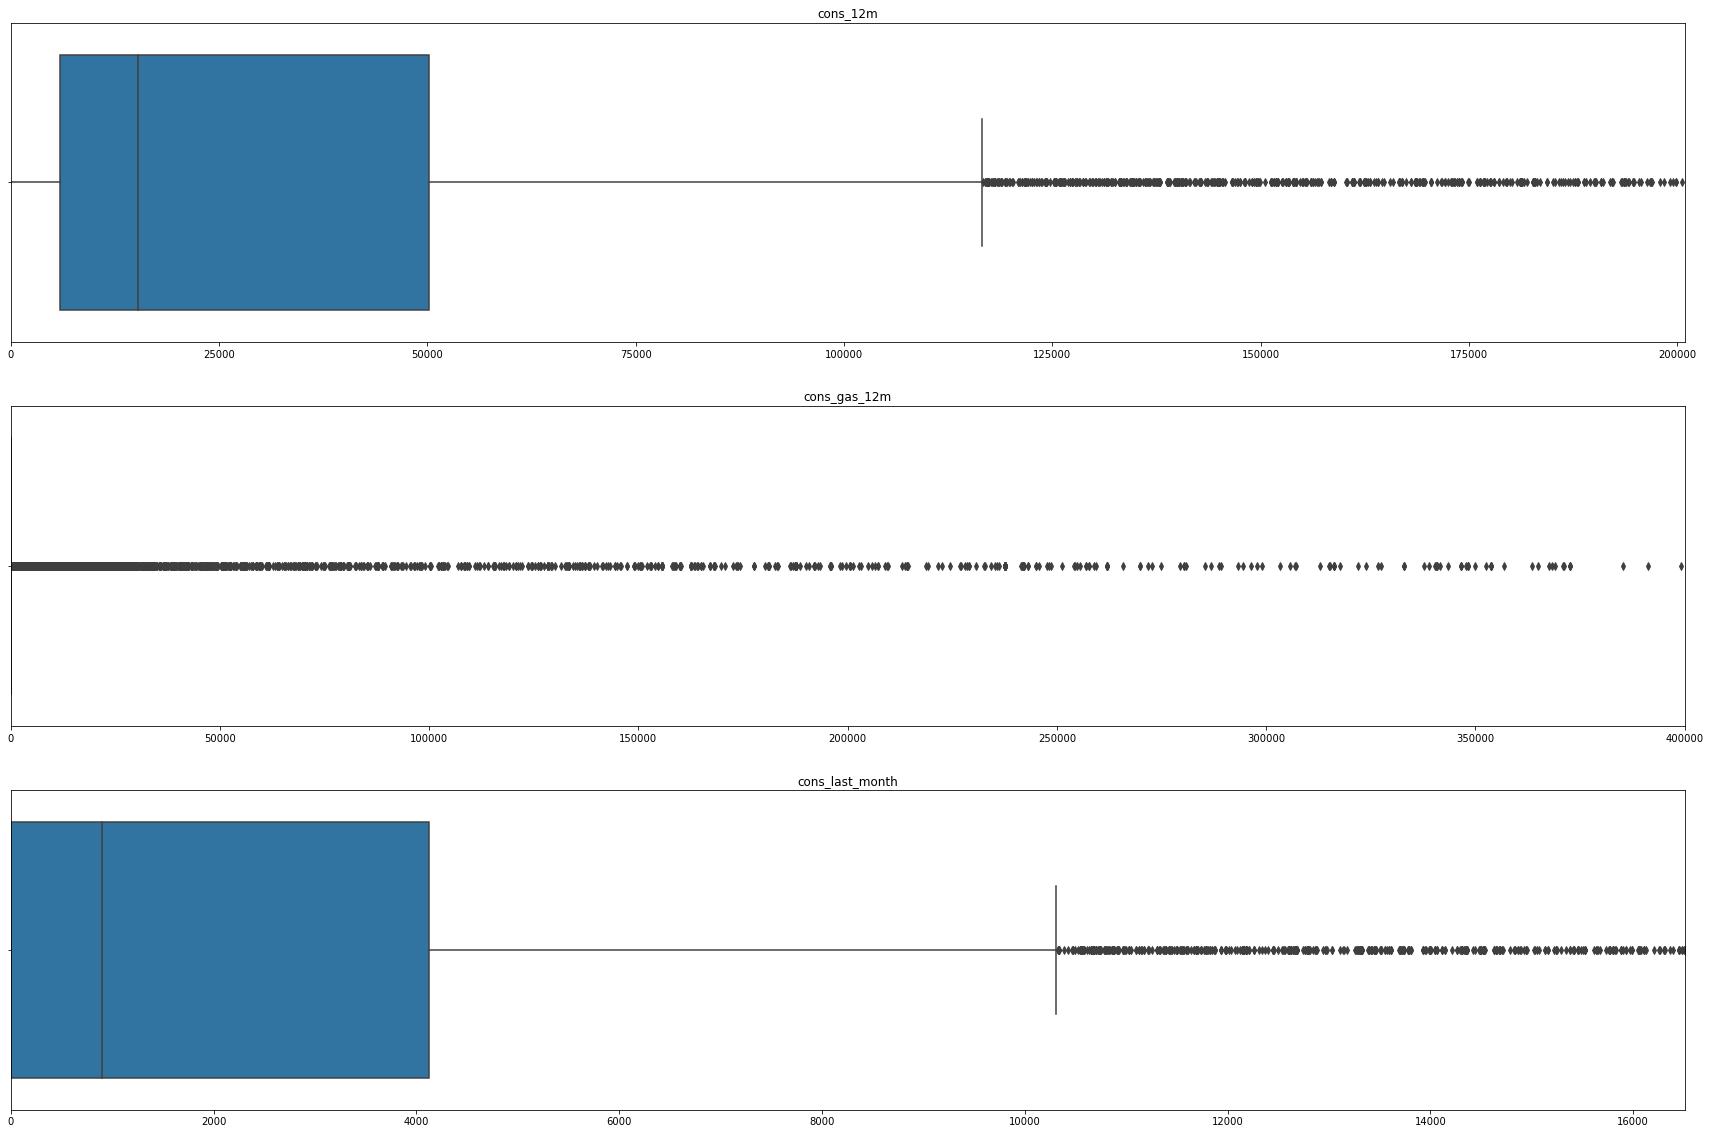

In [76]:
fig = plt.figure(figsize=(30,20))
for i,col in enumerate(col_list):
    ax = fig.add_subplot(3,1,i+1)
    sns.boxplot(x=col, data=df)
    if col=="cons_gas_12m":
        ax.set_xlim([0, 400000])
    else:
        ax.set_xlim([0, df.describe().loc["75%", col]*4])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(col)
plt.show()
# sns.boxplot(data=df, x="cons_12m", palette="Blues")
# sns.boxplot(data=df, x=)

In [70]:
len(df[df["cons_gas_12m"]!=0]) / len(df)

0.18176733780760626

---
box plot 결과 cons_12m의 평균은 19000정도, cons_last_month의 평균은 1000정도에 위치해 있는 것에 비해 75% quartile은 각각 120000, 10500 정도에 위치하여 편차가 큰 편이다.  
특히 상당히 높은 수치들에 아웃라이어가 형성 되어 있다.  

cons_gas_month의 경우 75% 이상의 데이터가 0이며, 나머지 데이터들이 넓은 범위에 걸쳐 분포되어 있다.  
따라서 분포를 확인하기 부적합하다.  
---


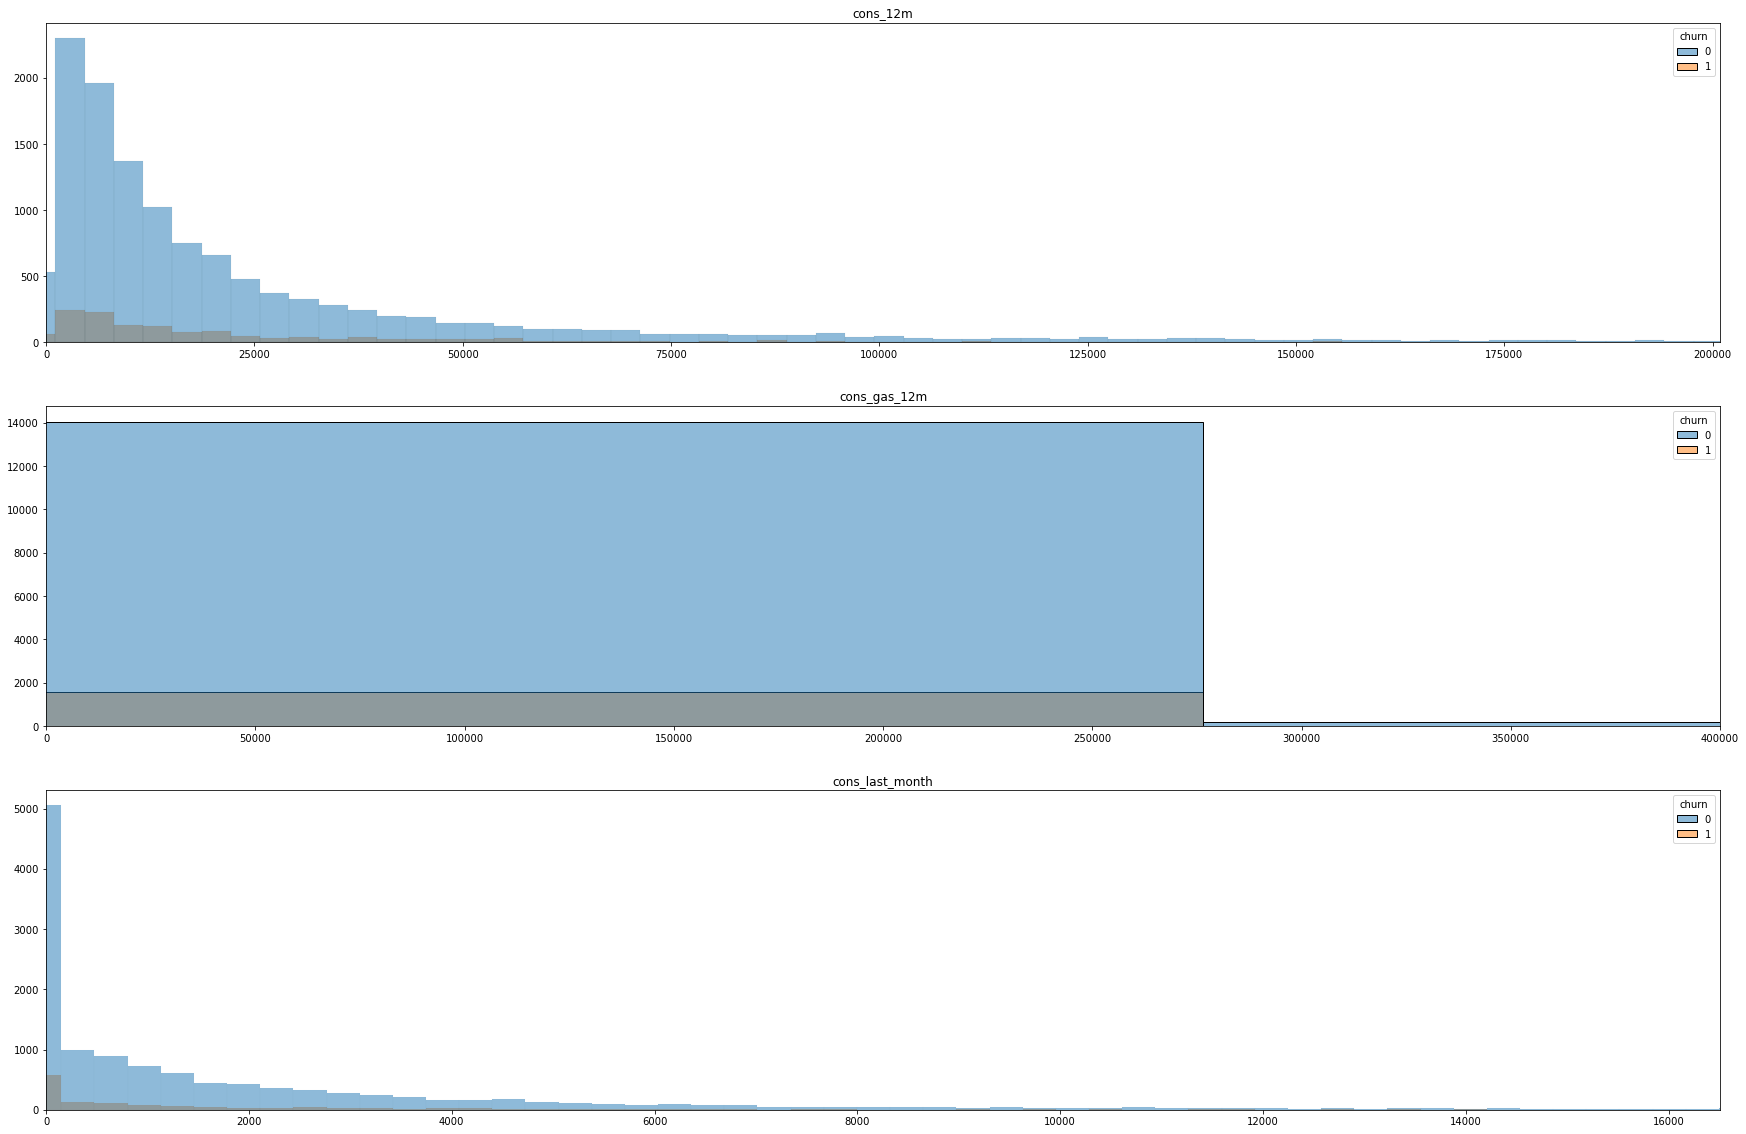

In [80]:
fig = plt.figure(figsize=(30,20))
for i,col in enumerate(col_list):
    ax = fig.add_subplot(3,1,i+1)
    sns.histplot(x=col, data=df, hue="churn")
    if col=="cons_gas_12m":
        ax.set_xlim([0, 400000])
    else:
        ax.set_xlim([0, df.describe().loc["75%", col]*4])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(col)
plt.show()

---
구체적인 분포를 그려 보았을 때, cons_12m과 cons_last_month의 경우 카이제곱 분포와 비슷한 양상을 따랐다.  
cons_gas_month는 데이터 분포가 너무 넓은 지역에 고르게 퍼져 있어 분포를 확인하기 어려웠다.  
단, 특정 구간 이상부터 유의미하게 데이터가 적은 현상이 나타났다.  

churn 과 함께 봤을 때, churn 변수와 상기 변수들 간의 상관관계가 유의미하지 않기 때문에 분포 또한 비슷하게 나타났다.   

---